In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [5]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
data['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [16]:
#Let's try one-encode our dataframe
data_one_hot = pd.get_dummies(data)
data_one_hot.tail()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,30.97,3,10600.5483,0,1,1,0,0,1,0,0
1334,18,31.92,0,2205.9808,1,0,1,0,1,0,0,0
1335,18,36.85,0,1629.8335,1,0,1,0,0,0,1,0
1336,21,25.80,0,2007.9450,1,0,1,0,0,0,0,1
1337,61,29.07,0,29141.3603,1,0,0,1,0,1,0,0


In [28]:
X = data_one_hot.drop('charges',axis=1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [29]:
y = data_one_hot['charges']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [33]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [36]:
#Build a neural networking 

tf.random.set_seed(42)

data_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

data_model.compile(loss = tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=['mae'])

data_model.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7493.1743 - mae: 7493.1743

34/34 [==============================] - 0s 3ms/step - loss: 7176.5205 - mae: 7176.5205
Epoch 83/100
34/34 [==============================] - 0s 3ms/step - loss: 7425.6289 - mae: 7425.6289
Epoch 84/100
34/34 [==============================] - 0s 3ms/step - loss: 7403.1289 - mae: 7403.1289
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 7356.0093 - mae: 7356.0093
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 7484.7271 - mae: 7484.7271
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 7217.6079 - mae: 7217.6079
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 7261.0000 - mae: 7261.0000
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 7134.1553 - mae: 7134.1553
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 7083.4351 - mae: 7083.4351
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 7254.1782 - mae: 7254.1782
Epo

In [37]:
#Checks tge results of the data model


data_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [40]:
#Improve Build a neural networking 

tf.random.set_seed(42)

data_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

data_model2.compile(loss = tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['mae'])

data_model2.fit(X_train,y_train, epochs=100, verbose=0)

In [41]:
#Evaluate the larger model

data_model2.fit(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4929.6309 - mae: 4929.6309


In [42]:
#Improve Build a neural networking 

tf.random.set_seed(42)

data_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

data_model3.compile(loss = tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['mae'])

history = data_model3.fit(X_train,y_train, epochs=200, verbose=0)

In [43]:
#Evaluate the larger model

data_model3.fit(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3492.1687 - mae: 3492.1687


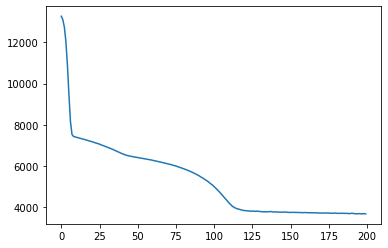

In [46]:
plt.plot(history.history['loss'])

<AxesSubplot:ylabel='Frequency'>

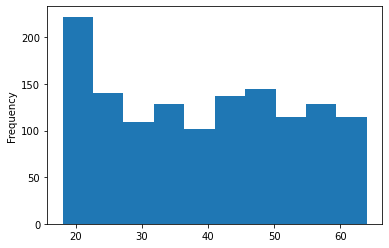

In [47]:
X['age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

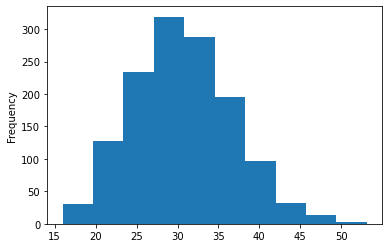

In [48]:
X['bmi'].plot(kind='hist')

In [50]:
data2 = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
data2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create a column transformer

ct = make_column_transformer(
                            (MinMaxScaler(),['age','bmi','children']),
                            (OneHotEncoder(), ['sex','smoker', 'region'])
                            )

In [67]:
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['sex', 'smoker', 'region'])])

In [68]:
X = data2.drop('charges', axis=1)
y = data2['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [69]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [70]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['sex', 'smoker', 'region'])])

In [71]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [72]:
pd.DataFrame(X_train_normal)

,0,1,2,3,4,5,6,7,8,9,10
0,0.608696,0.107345,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.239440,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.493947,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.148238,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1065,0.000000,0.414044,0.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1066,0.456522,0.212806,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1067,0.869565,0.247915,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1068,0.413043,0.851224,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [84]:
data_model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    
])

data_model4.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam( learning_rate=0.005),
                   metrics=['mae','mse'])

hist = data_model4.fit(X_train_normal,y_train,batch_size=2, epochs=100)

Epoch 1/100
535/535 [==============================] - 2s 3ms/step - loss: 10398.7480 - mae: 10398.7480 - mse: 236939872.0000
Epoch 2/100
535/535 [==============================] - 2s 3ms/step - loss: 6818.3003 - mae: 6818.3003 - mse: 139569872.0000
Epoch 3/100
535/535 [==============================] - 2s 3ms/step - loss: 4095.1155 - mae: 4095.1155 - mse: 77953112.0000
Epoch 4/100
535/535 [==============================] - 1s 3ms/step - loss: 3676.8291 - mae: 3676.8291 - mse: 58847316.0000
Epoch 5/100
535/535 [==============================] - 1s 3ms/step - loss: 3526.0659 - mae: 3526.0659 - mse: 51885940.0000
Epoch 6/100
535/535 [==============================] - 2s 3ms/step - loss: 3448.5535 - mae: 3448.5535 - mse: 48187512.0000
Epoch 7/100
535/535 [==============================] - 2s 3ms/step - loss: 3403.9299 - mae: 3403.9299 - mse: 46585856.0000
Epoch 8/100
535/535 [==============================] - 2s 3ms/step - loss: 3385.3030 - mae: 3385.3030 - mse: 46139824.0000
Epoch 9/100


535/535 [==============================] - 2s 3ms/step - loss: 1821.1083 - mae: 1821.1083 - mse: 23482450.0000
Epoch 68/100
535/535 [==============================] - 2s 3ms/step - loss: 1803.1635 - mae: 1803.1635 - mse: 23565884.0000
Epoch 69/100
535/535 [==============================] - 2s 3ms/step - loss: 1799.1046 - mae: 1799.1046 - mse: 23482626.0000
Epoch 70/100
535/535 [==============================] - 2s 3ms/step - loss: 1810.5443 - mae: 1810.5443 - mse: 23650566.0000
Epoch 71/100
535/535 [==============================] - 2s 3ms/step - loss: 1795.2645 - mae: 1795.2645 - mse: 23446506.0000
Epoch 72/100
535/535 [==============================] - 2s 3ms/step - loss: 1800.6995 - mae: 1800.6995 - mse: 23459958.0000
Epoch 73/100
535/535 [==============================] - 2s 3ms/step - loss: 1790.6829 - mae: 1790.6829 - mse: 23353528.0000
Epoch 74/100
535/535 [==============================] - 2s 3ms/step - loss: 1794.6694 - mae: 1794.6694 - mse: 23457668.0000
Epoch 75/100
535/535 

In [85]:
data_model4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1556.9447 - mae: 1556.9447 - mse: 19868658.0000


[1556.9447021484375, 1556.9447021484375, 19868658.0]

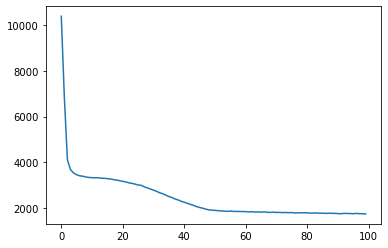

In [86]:
plt.plot(hist.history['loss'])

In [102]:
data_model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
    
])

data_model5.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam( learning_rate=0.01),
                   metrics=['mae','mse'])

hist = data_model5.fit(X_train_normal,y_train,batch_size=2, epochs=100)

Epoch 1/100
535/535 [==============================] - 2s 3ms/step - loss: 8822.1582 - mae: 8822.1582 - mse: 190236656.0000
Epoch 2/100
535/535 [==============================] - 2s 3ms/step - loss: 3975.9995 - mae: 3975.9995 - mse: 69625656.0000
Epoch 3/100
535/535 [==============================] - 2s 3ms/step - loss: 3568.6370 - mae: 3568.6370 - mse: 50752812.0000
Epoch 4/100
535/535 [==============================] - 2s 3ms/step - loss: 3449.6104 - mae: 3449.6104 - mse: 46455232.0000
Epoch 5/100
535/535 [==============================] - 2s 3ms/step - loss: 3398.9204 - mae: 3398.9204 - mse: 46399316.0000
Epoch 6/100
535/535 [==============================] - 2s 3ms/step - loss: 3369.3621 - mae: 3369.3621 - mse: 47103408.0000
Epoch 7/100
535/535 [==============================] - 2s 3ms/step - loss: 3352.1731 - mae: 3352.1731 - mse: 47588108.0000
Epoch 8/100
535/535 [==============================] - 2s 3ms/step - loss: 3325.5601 - mae: 3325.5601 - mse: 47374136.0000
Epoch 9/100
535

535/535 [==============================] - 2s 4ms/step - loss: 1772.7632 - mae: 1772.7632 - mse: 22870846.0000
Epoch 68/100
535/535 [==============================] - 2s 4ms/step - loss: 1756.8075 - mae: 1756.8075 - mse: 22966224.0000
Epoch 69/100
535/535 [==============================] - 2s 4ms/step - loss: 1754.4182 - mae: 1754.4182 - mse: 22751404.0000
Epoch 70/100
535/535 [==============================] - 2s 4ms/step - loss: 1770.0424 - mae: 1770.0424 - mse: 23408360.0000
Epoch 71/100
535/535 [==============================] - 2s 3ms/step - loss: 1761.2756 - mae: 1761.2756 - mse: 22913830.0000
Epoch 72/100
535/535 [==============================] - 2s 3ms/step - loss: 1751.9276 - mae: 1751.9276 - mse: 22902796.0000
Epoch 73/100
535/535 [==============================] - 2s 4ms/step - loss: 1751.8566 - mae: 1751.8566 - mse: 22768262.0000
Epoch 74/100
535/535 [==============================] - 2s 3ms/step - loss: 1758.3408 - mae: 1758.3408 - mse: 23040912.0000
Epoch 75/100
535/535 

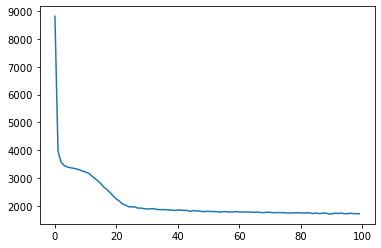

In [103]:
plt.plot(hist.history['loss'])

In [104]:
data_model5.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1636.0773 - mae: 1636.0773 - mse: 19614724.0000


[1636.0772705078125, 1636.0772705078125, 19614724.0]